Found 628 images belonging to 2 classes.
Found 157 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 7s 248ms/step - loss: 0.7238 - accuracy: 0.6115 - val_loss: 0.6716 - val_accuracy: 0.6115
Epoch 2/10
20/20 [==============================] - 4s 206ms/step - loss: 0.3868 - accuracy: 0.8376 - val_loss: 0.8142 - val_accuracy: 0.5796
Epoch 3/10
20/20 [==============================] - 4s 209ms/step - loss: 0.3160 - accuracy: 0.8838 - val_loss: 0.9720 - val_accuracy: 0.5796
Epoch 4/10
20/20 [==============================] - 5s 219ms/step - loss: 0.2505 - accuracy: 0.9045 - val_loss: 0.9233 - val_accuracy: 0.5860
Epoch 5/10
20/20 [==============================] - 4s 211ms/step - loss: 0.2203 - accuracy: 0.9204 - val_loss: 0.8371 - val_accuracy: 0.6051
Epoch 6/10
20/20 [==============================] - 4s 200ms/step - loss: 0.1943 - accuracy: 0.9331 - val_loss: 0.8765 - val_accuracy: 0.5987
Epoch 7/10
20/20 [==============================] - 4s 215ms/step 

INFO:tensorflow:Assets written to: car_bike_classifier\assets


1/1 [==============================] - 0s 131ms/step
The model predicts this image is a car.


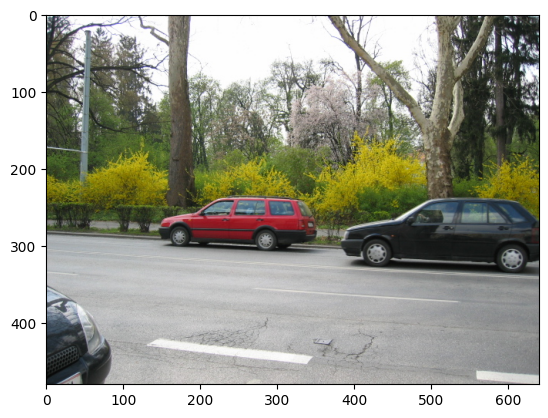

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image

# Define paths
car_dir = r'C:\Users\Thilini Sewwandi\Downloads\11\11\cars'
bike_dir = r'C:\Users\Thilini Sewwandi\Downloads\11\11\bike'

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

# Load images from directories
train_generator = datagen.flow_from_directory(
    directory=r'C:\Users\Thilini Sewwandi\Downloads\11\11',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='training'
)

valid_generator = datagen.flow_from_directory(
    directory=r'C:\Users\Thilini Sewwandi\Downloads\11\11',
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='validation'
)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data = valid_generator,
    epochs = 10,
    verbose = 1
)

# Save the model
model.save('car_bike_classifier')

# Load the trained model
model = tf.keras.models.load_model('car_bike_classifier')

# Define the directories
directories = [car_dir, bike_dir]

# Choose a random directory (car or bike)
dir = random.choice(directories)

# Get a random image from the chosen directory
random_image = random.choice(os.listdir(dir))

# Load the image in its original size for display
img_display = Image.open(os.path.join(dir, random_image))

# Load the image with target size for prediction
img = image.load_img(os.path.join(dir, random_image), target_size=(64, 64))

# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)

# Use the model to predict the class of the image
prediction = model.predict(img_array_expanded)

# Print the prediction
if prediction[0][0] == 0:
    print("The model predicts this image is a bike.")
else:
    print("The model predicts this image is a car.")

# Display the original image
plt.imshow(img_display)
plt.show()